In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import readFasta


In [2]:
head, genome = readFasta("Salmonella_enterica.txt")

Ori location:  3764855


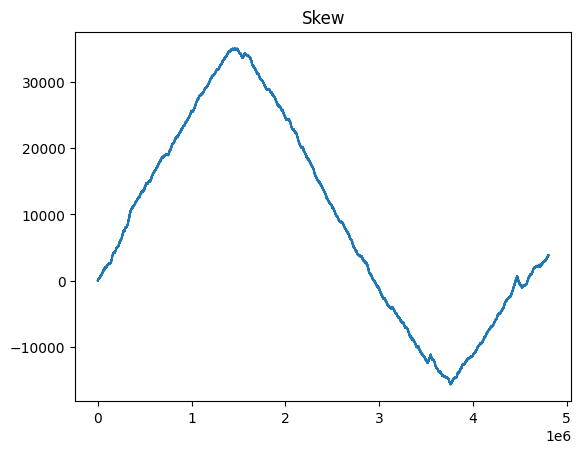

In [3]:
def skew(genome):
    d = {'G' : 1, 'C' : -1, 'A' : 0, 'T' : 0}
    arr = np.zeros(len(genome))
    for i in range(1, len(genome)):
        arr[i] = arr[i-1] + d[genome[i]]
    return arr

skew_array = skew(genome)
ori_location = np.where(skew_array == min(skew_array))[0][0] # location of minimum skew
print("Ori location: ", ori_location)
plt.plot(range(len(genome)), skew_array)
plt.title("Skew")
plt.show()

In [4]:
def HammingDistance(s1, s2):
    dist = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            dist += 1
    return dist

def reverseComplement(s):
    ans = ""
    d = {"A" : "T", "T" : "A", "G" : "C", "C" : "G"}
    for letter in s:
        ans += d[letter]
    return ans[::-1]


def findPatternWithMismatches(text, pattern, d):
    k = len(pattern)
    n = len(text)
    count = 0
    #positions = []
    for i in range(n - k):
        if HammingDistance(text[i:i+k], pattern) <= d:
            count += 1
            #positions.append(i)
    return count

def neighborhood(pattern, d):
    neighbors = []
    k = len(pattern)
    
    def recurse(s, diffs):
        if len(s) < k:
            if diffs > 0:
                for letter in ['A', 'T', 'G', 'C']:
                    if letter == pattern[len(s)]:
                        recurse(s + letter, diffs)    
                    else:
                        recurse(s + letter, diffs-1)   
            else:
                recurse(s + pattern[len(s)], 0) 
        else:
            neighbors.append(s)
    
    recurse('', d)
    return neighbors


    
def FrequentMatchesWithMismatches(genome, k, d):
    freqMap = {}
    n = len(genome)
    for i in range(n-k+1):
        pattern = genome[i:i+k]
        neighbors = neighborhood(pattern, d)
        cPattern = reverseComplement(pattern)
        neighbors += neighborhood(cPattern, d)
        for nb in neighbors:
            if nb not in freqMap.keys():
                freqMap[nb] = 1
            else:
                freqMap[nb] += 1
    maxVal = max(freqMap.values())
    ans = []
    for key in freqMap.keys():
        if freqMap[key] == maxVal:
            ans.append(key)
    return ans, maxVal

In [5]:
FrequentMatchesWithMismatches(genome[ori_location-250:ori_location+250], 10, 2)
s = "atgaccgggatactgatAgAAgAAAGGttGGGggcgtacacattagataaacgtatgaagtacgttagactcggcgccgccgacccctattttttgagcagatttagtgacctggaaaaaaaatttgagtacaaaacttttccgaatacAAtAAAAcGGcGGGatgagtatccctgggatgacttAAAAtAAtGGaGtGGtgctctcccgatttttgaatatgtaggatcattcgccagggtccgagctgagaattggatgcAAAAAAAGGGattGtccacgcaatcgcgaaccaacgcggacccaaaggcaagaccgataaaggagatcccttttgcggtaatgtgccgggaggctggttacgtagggaagccctaacggacttaatAtAAtAAAGGaaGGGcttataggtcaatcatgttcttgtgaatggatttAAcAAtAAGGGctGGgaccgcttggcgcacccaaattcagtgtgggcgagcgcaacggttttggcccttgttagaggcccccgtAtAAAcAAGGaGGGccaattatgagagagctaatctatcgcgtgcgtgttcataacttgagttAAAAAAtAGGGaGccctggggcacatacaagaggagtcttccttatcagttaatgctgtatgacactatgtattggcccattggctaaaagcccaacttgacaaatggaagatagaatccttgcatActAAAAAGGaGcGGaccgaaagggaagctggtgagcaacgacagattcttacgtgcattagctcgcttccggggatctaatagcacgaagcttActAAAAAGGaGcGGa"
s = s.upper()
#FrequentMatchesWithMismatches(s, 15, 4) - too slow!

